# Projeto Python

## Códigos e gráficos

In [1]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Carregando banco de dados
df = pd.read_csv("https://raw.githubusercontent.com/Manuelfjr/NumericalMethods/master/ProjetoNP/DadosCompletosMovimentacao.csv", sep = ';')

In [3]:
# Gerando uma variável numérica associada aos meses:

nome_meses = np.array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio','Junho',
                  'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

num_mes = np.zeros(df.shape[0])

for i in range(12):
    num_mes[df['Mês'] == nome_meses[i]] = i + 1
    
ID_mes = pd.Series(num_mes, name='ID_mes')
df = pd.concat([df, ID_mes], axis = 1)

## Fluxo total de passageiros

In [4]:
df_2015 = df[df['Ano'] == 2015]
df_2017 = df[df['Ano'] == 2017]
df_2019 = df[df['Ano'] == 2019]

totais_p_2015 = np.zeros(12)
totais_p_2017 = np.zeros(12)
totais_p_2019 = np.zeros(12)

for i in range(12):
    totais_p_2015[i] = np.sum(df_2015['Passageiro (un)'][df_2015['ID_mes'] == i + 1])
    totais_p_2017[i] = np.sum(df_2017['Passageiro (un)'][df_2017['ID_mes'] == i + 1])
    totais_p_2019[i] = np.sum(df_2019['Passageiro (un)'][df_2019['ID_mes'] == i + 1])

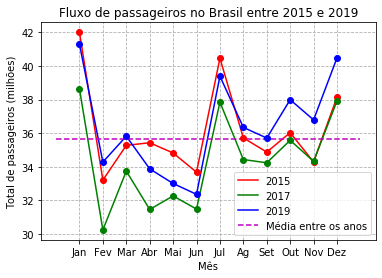

In [5]:
plt.plot(range(1,13), totais_p_2015/1e6, 'r')
plt.plot(range(1,13), totais_p_2017/1e6, 'g')
plt.plot(range(1,13), totais_p_2019/1e6, 'b')
plt.plot([0,13], [np.mean([np.mean(totais_p_2015), np.mean(totais_p_2017), np.mean(totais_p_2019)])/1e6,
                  np.mean([np.mean(totais_p_2015), np.mean(totais_p_2017), np.mean(totais_p_2019)])/1e6], 'm--')
plt.legend(['2015', '2017', '2019', 'Média entre os anos'], loc = 4)

plt.plot(range(1,13), totais_p_2015/1e6, 'ro')
plt.plot(range(1,13), totais_p_2017/1e6, 'go')
plt.plot(range(1,13), totais_p_2019/1e6, 'bo')


plt.title('Fluxo de passageiros no Brasil entre 2015 e 2019')
plt.xlabel('Mês')
plt.xticks(range(1,13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai','Jun', 'Jul',
                         'Ag', 'Set', 'Out', 'Nov', 'Dez'])
plt.ylabel('Total de passageiros (milhões)')


plt.grid(linestyle = '--')
plt.savefig('GrafLinha_passageiros.png')
plt.show()

## Regressão

In [8]:
from scipy import stats

In [9]:
# Um subconjunto de df com os valores para o mês de Junho:
df_jun = df[df['ID_mes'] == 6]

# Variáveis de interesse
passageiros_jun = np.zeros(16)
aeronaves_jun = np.zeros(16)

# Totais:
for i in range(16):
    passageiros_jun[i] = np.sum(df_jun['Passageiro (un)'][df_jun['Ano'] == 2004 + i])/1e6
    aeronaves_jun[i] = np.sum(df_jun['Aeronave (un)'][df_jun['Ano'] == 2004 + i])/1e3

**Número total de passageiros com o tempo:**

In [12]:
# A função linregress() de stats retorna 5 objetos
coef_ang = np.zeros(14)  # Coeficiente angular
intercept = np.zeros(14) # Intercept (Coeficiente linear)
corr = np.zeros(14)      # Coeficiente de correlação
p_valor = np.zeros(14)   # P-valor
erro = np.zeros(14)      # Erro padrão

# Cada estimativa será feita com os três anos anteriores
for i in range(14):
    coef_ang[i], intercept[i], corr[i], p_valor[i], erro[i] = stats.linregress(range(2004 + i, 2007 + i),
                                                                         passageiros_jun[range(i, i + 3)])
estimativas = np.zeros(14)

for i in range(14):
    estimativas[i] = coef_ang[i]*(2007 + i) + intercept[i]

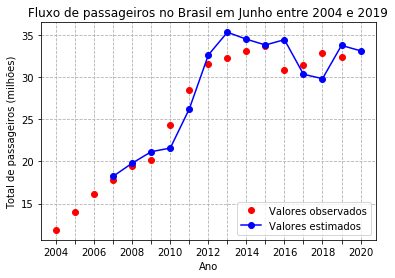

In [11]:
plt.plot(range(2004,2020), passageiros_jun, 'ro')
plt.plot(range(2007,2021), estimativas, 'bo-')
plt.legend(['Valores observados', 'Valores estimados'], loc = 4)

plt.title('Fluxo de passageiros no Brasil em Junho entre 2004 e 2019')
plt.xticks(range(2004,2021), ['2004', '', '2006', '', '2008', '', '2010', '',
                              '2012', '', '2014', '', '2016', '', '2018','', '2020'])
plt.xlabel('Ano')
plt.ylabel('Total de passageiros (milhões)')

plt.grid(linestyle = '--')
plt.savefig('Regressao_passageiros.png')
plt.show()

In [15]:
# Razão entre valores estimados e observados:
print("Mínimo: ",np.min(estimativas[range(13)]/passageiros_jun[range(3,16)]))
print()
print("Máximo: ",np.max(estimativas[range(13)]/passageiros_jun[range(3,16)]))
print()
print("Média: ",np.mean(estimativas[range(13)]/passageiros_jun[range(3,16)]))
print()
print("C.V.: ", np.std(estimativas[range(13)]/passageiros_jun[range(3,16)])/np.mean(
    estimativas[range(13)]/passageiros_jun[range(3,16)]))
print()
print(estimativas[range(13)]/passageiros_jun[range(3,16)])

Mínimo:  0.8857503998624379

Máximo:  1.115618828087587

Média:  1.0077940927045732

C.V.:  0.06693367532942497

[1.02554427 1.0160878  1.0465937  0.8857504  0.92104913 1.03396195
 1.09611051 1.04297104 1.00399594 1.11561883 0.96368889 0.90648322
 1.04346754]


Estimativa pontual para Junho de 2020:

In [16]:
coef_ang[13]*(2020) + intercept[13]

33.122476000000006